##Project - Netflix EDA/Visualization

###Individual Project

###By - Muskan Chauhan

###Gituhub Link:- https://github.com/Muskan-Chauhan2002

###Import libraries

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

###Mount the drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Import file

In [5]:
file_path = ('/content/drive/MyDrive/Labmentix Projects/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
NETFLIX = pd.read_csv(file_path)

###First look of dataset

In [6]:
NETFLIX.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


###Dataset information

In [7]:
NETFLIX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


###Statistic description

In [8]:
NETFLIX.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


###Number of rows and columns

In [9]:
rows , columns = NETFLIX.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 7787
Number of columns: 12


###Total duplicated rows

In [10]:
duplicate_count = NETFLIX.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


###Total null rows

In [11]:
print(NETFLIX.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


###Filling of null rows

In [12]:
NETFLIX['director'].fillna('Unknown',inplace=True)
NETFLIX['cast'].fillna('Unknown',inplace=True)
NETFLIX['country'].fillna('Unknown',inplace=True)
NETFLIX['date_added'].fillna('Not Available', inplace=True)
NETFLIX['rating'].fillna('Unrated', inplace=True)

<ipython-input-12-18f8db1e6750>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NETFLIX['director'].fillna('Unknown',inplace=True)
<ipython-input-12-18f8db1e6750>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [13]:
NETFLIX['date_added'] = NETFLIX['date_added'].replace('Not Available', pd.NA)
NETFLIX['date_added'] = pd.to_datetime(NETFLIX['date_added'], errors='coerce')


###Visualization

###Distribution of content type

<ipython-input-14-0fe92f88d42e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=NETFLIX, x='type', palette='Set2')


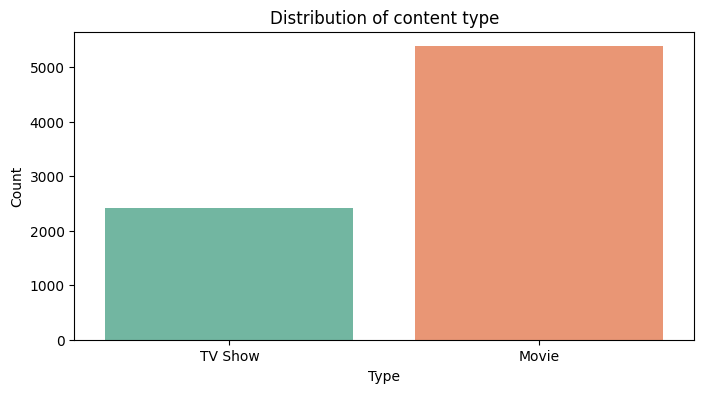

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(data=NETFLIX, x='type', palette='Set2')
plt.title("Distribution of content type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

###Top 10 countries by content count

<ipython-input-22-978130348edb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set3')


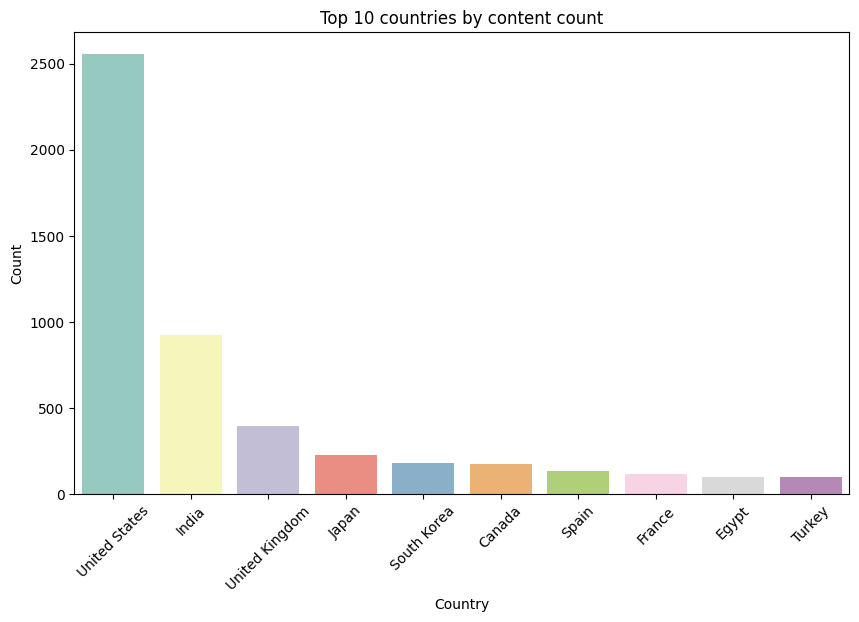

In [22]:
top_countries = NETFLIX['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set3')
plt.title("Top 10 countries by content count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


###Top 10 most common Genres

<ipython-input-16-3b169e13da33>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')


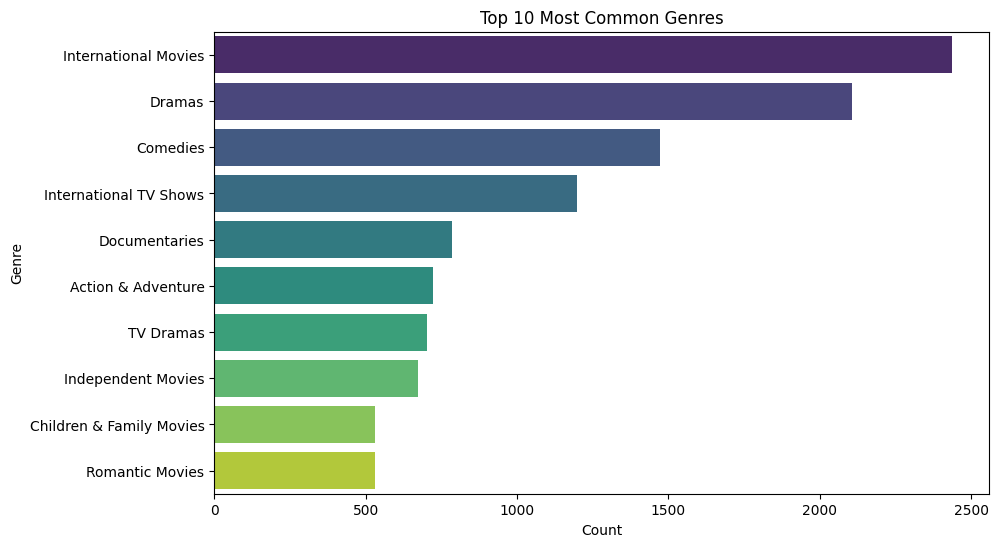

In [16]:
from collections import Counter

# defining genres
genre_list = NETFLIX['listed_in'].dropna().str.split(', ')
all_genres = [genre for sublist in genre_list for genre in sublist]
top_genres = Counter(all_genres).most_common(10)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


###Rating Distribution by Type

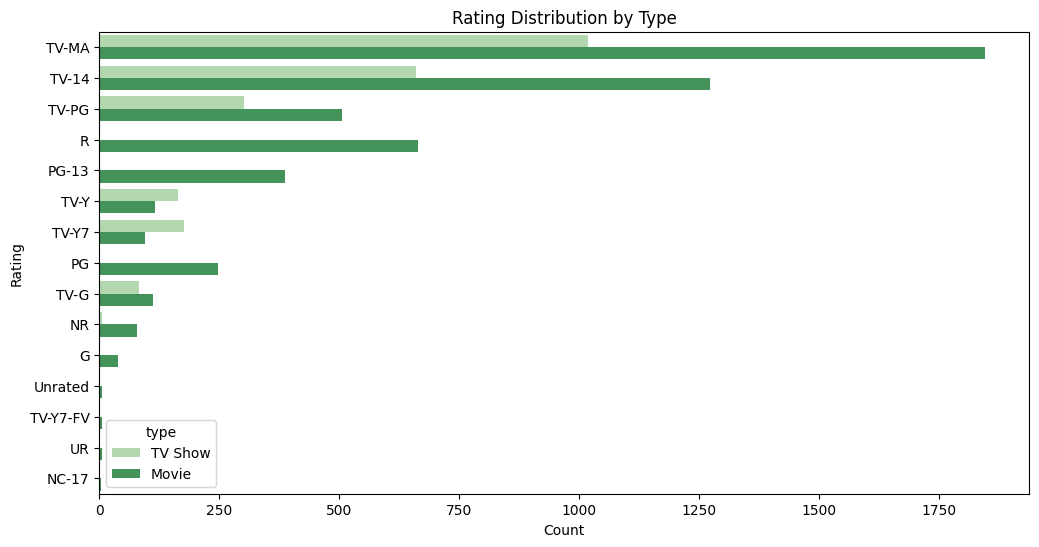

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(data=NETFLIX, y='rating', hue='type', order=NETFLIX['rating'].value_counts().index, palette='Greens')
plt.title("Rating Distribution by Type")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

###Content Type by Country

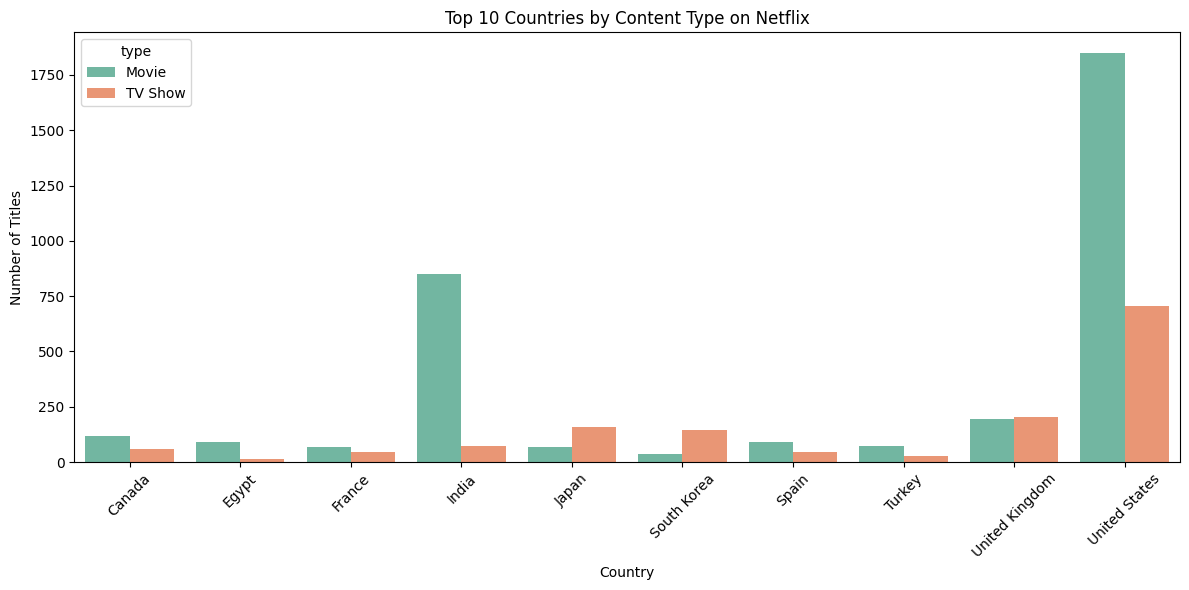

In [18]:
#drop rows with missing countries
NETFLIX['country'] = NETFLIX['country'].replace(['', 'Unknown'], pd.NA)
netflix_clean = NETFLIX.dropna(subset=['country'])
#group by country and type
country_type_counts = netflix_clean.groupby(['country','type']).size().reset_index(name='count')
# Focus on top 10 countries with most titles
top_countries = country_type_counts.groupby('country')['count'].sum().sort_values(ascending=False).head(10).index
filtered_data = country_type_counts[country_type_counts['country'].isin(top_countries)]
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='country', y='count', hue='type', palette='Set2')
plt.title('Top 10 Countries by Content Type on Netflix')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

###Trend over the Years in Movies and TV shows

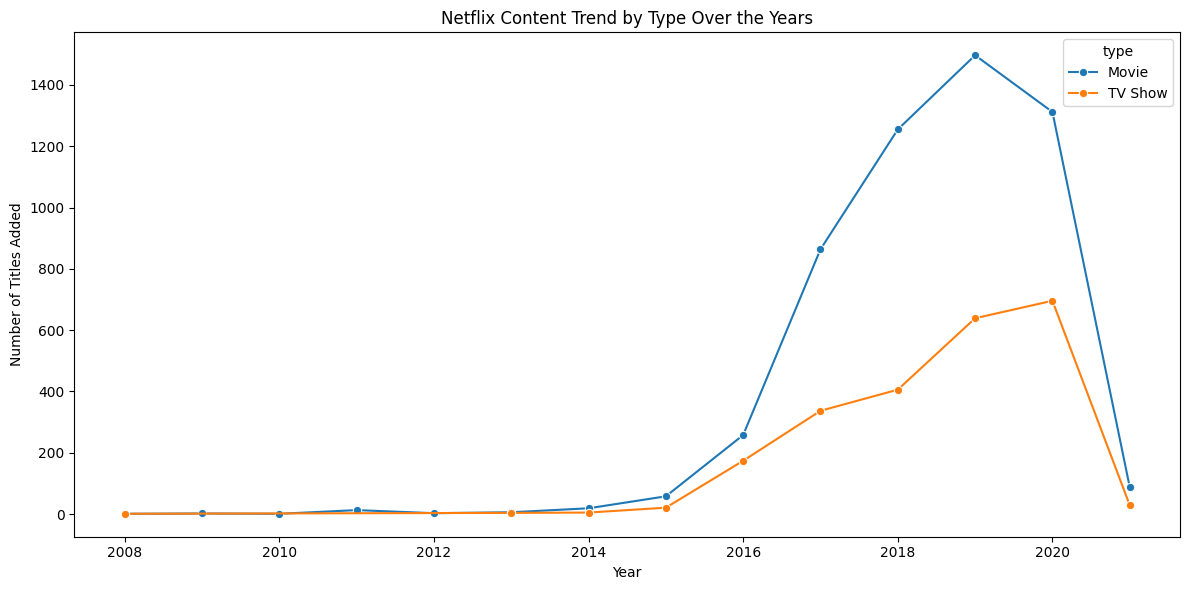

In [19]:
NETFLIX['year_added'] = NETFLIX['date_added'].dt.year
type_trend = NETFLIX.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=type_trend, x='year_added', y='count', hue='type', marker='o')
plt.title('Netflix Content Trend by Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.tight_layout()
plt.show()


##Conclusion:
The dataset contains a total of 7,787 titles, with most of the content being movies and the rest TV shows. The USA leads with the highest number of titles, followed by countries like India, the UK, and Japan. A large part of the content belongs to international genres, especially dramas and comedies. On the other hand, children’s movies and romantic movies are less common. In terms of age ratings, TV-MA is the most frequent, followed by TV-14. Although movies outnumber TV shows overall, both have increased steadily over the years—especially after 2014, with a noticeable surge in movie releases.



#How the project is useful to stakeholders?
##1. Opportunity in underrated genre:
###Stakeholders can use the project findings to delve into the least common genres like Romantic movies and Children and Family movies. This can help to tempt the niche audience.

##2. Strategize the Content:
###Creators can use the data to understand the potential content type (Movies or TV shows) and relative genres are popular. This will help the creators to produce or acquire those contents.

##3. Help in targeting the market:
###Conclusions will help the stakeholders to target the potential markets in each country observing the content type consumption in particular region or the nation. They can produce or launch the content as per the most consumption of content type.